In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse
import random
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')

In [22]:
Orginal_data=pd.read_csv('/home/muhammadshahzad/Downloads/Final_Data.csv')
data.head()

,Team,Inning,Overs,Runs,Wickets,Balls_Remained,Batting_Strike_Rate,Bowling_Strike_Rate,Venue,Win_Loss,Target
0,0,1,2.5,0,2,101,1388,156,0,1,147
1,0,1,17.5,1,5,10,1088,134,0,0,31
2,1,1,7.7,1,3,70,1432,156,0,0,121
3,1,2,18.2,1,8,8,1295,141,0,0,24
4,1,2,4.6,0,4,90,1295,141,0,0,91


In [23]:
# Seprating the dependent and indenpendent variables
x=data.drop(['Target'], axis=1)
y=data.Target

In [24]:
# Creating training, testing and validation sets
from sklearn.model_selection import train_test_split as tts
train_X,test_x, train_Y,test_y=tts(x,y, test_size=0.10,random_state=101)
train_x,val_x, train_y, val_y=tts(train_X,train_Y,test_size=0.10,random_state=101)

In [25]:
from sklearn.tree import DecisionTreeRegressor
model_1=DecisionTreeRegressor()
model_1.fit(train_x,train_y)
M1_train=model_1.predict(train_x)
M1_test=model_1.predict(test_x)
M1_val=model_1.predict(val_x)
training_error=mse(M1_train,train_y) # mse stands for Mean_Squared_Error
training_error=np.sqrt(training_error)
testing_error=mse(M1_test,test_y)
testting_error=np.sqrt(testing_error)
validation_erro=mse(M1_val,val_y)
validation_erro=np.sqrt(validation_erro)
print('Training error: ',training_error)
print('Testing error: ',testing_error)
print('validation_error: ',validation_erro)

Training error:  0.0
Testing error:  7.574468085106383
validation_error:  2.830530826877666


In [47]:
from sklearn.ensemble import BaggingRegressor as bg 
model_2= bg()
model_2.fit(train_x,train_y)
train_pred=model_2.predict(train_x)
test_pred=model_2.predict(test_x)
val_pred=model_2.predict(val_x)
error_train=mse(train_pred,train_y)
error_train=np.sqrt(error_train)
error_test=mse(test_pred,test_y)
error_test=np.sqrt(error_test)
error_val=mse(val_pred,val_y)
error_val=np.sqrt(error_val)
print('Training error: ',error_train)
print('Testin_error: ',error_test)
print('Valdation_error: ',error_val)

Training error:  1.0589886466069331
Testin_error:  2.6353569744872742
Valdation_error:  3.018317096535435


In [26]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
adaboost=AdaBoostRegressor(random_state=96,base_estimator=RandomForestRegressor(random_state=101),n_estimators=100,learning_rate=0.01)
adaboost.fit(train_x,train_y)
train_pred=adaboost.predict(train_x)
test_pred=adaboost.predict(test_x)
val_pred=adaboost.predict(val_x)
error_train=mse(train_pred,train_y)
error_trian=np.sqrt(error_train)
error_test=mse(test_pred,test_y)
error_test=np.sqrt(error_test)
error_val=mse(val_pred,val_y)
error_val=np.sqrt(error_val)
print('training_error',error_train)
print('test_error',error_test)
print('validation_error',error_val)

training_error 0.5289422516556294
test_error 2.507032661525862
validation_error 2.5852700881284014


In [30]:
# Let's try some real data
test=pd.read_excel('/home/muhammadshahzad/Downloads/1157374_1.xlsx')
test=test.drop(['Target'],axis=1)
test.Team=test.Team.map({'Australia':1, 'Pakistan':0})
test.Venue=test.Venue.map({'Home':1,'Away':0})
test.Win_Loss=test.Win_Loss.map({'Win':1, 'Loss':0})
test.Team.fillna(test.Team.mode()[0],inplace=True)
test.Batting_Strike_Rate=test.Batting_Strike_Rate.astype(int)
test.Bowling_Strike_Rate=test.Bowling_Strike_Rate.astype(int)
test.head()

,Team,Inning,Overs,Runs,Wickets,Balls_Remained,Batting_Strike_Rate,Bowling_Strike_Rate,Venue,Win_Loss
0,0,1,0.0,0,0,120,126,14,0,1
1,0,1,0.1,0,0,119,126,14,0,1
2,0,1,0.2,0,1,118,126,14,0,1
3,0,1,0.3,0,0,117,126,14,0,1
4,0,1,0.4,0,0,116,126,14,0,1


In [64]:
adaboost_pred=adaboost.predict(test)
print('Max value of prediction: ',adaboost_pred.max(),'\nMean value of prediction: ',adaboost_pred.mean(),'\nMin value of Prediction: ',adaboost_pred.min())

Max value of prediction:  141.45 
Mean value of prediction:  89.47184 
Min value of Prediction:  31.66


In [50]:
bagging_pred=model_2.predict(test)
print('Max value of prediction: ',xgboost_pred.max(),'\nMean value of prediction: ',xgboost_pred.mean(),'\nMin value of Prediction: ',xgboost_pred.min())

Max value of prediction:  141.9 
Mean value of prediction:  89.1176 
Min value of Prediction:  25.4


In [51]:
DTree_pred=model_1.predict(test)
print('Max value of prediction: ',DTree_pred.max(),'\nMean value of prediction: ',DTree_pred.mean(),'\nMin value of Prediction: ',DTree_pred.min())

Max value of prediction:  136.0 
Mean value of prediction:  88.544 
Min value of Prediction:  15.0


In [53]:
#Error of Decision Tree Regressor
error=(DTree_pred.max()-162)**2/162*100
error=np.sqrt(error)
print('error of Decison Tree Regressor: ',error)
# Error of AdaBoost Regressor
error_1=(adaboost_pred.max()-162)**2/162*100
error_1=np.sqrt(error_1)
print('Error of AdaBoost Regressor: ',error_1)
#Error of BaggingRegressor
error_2=(bagging_pred.max()-162)**2/162*100
erro_2=np.sqrt(error_2)
print('Error of BaggingRegressor: ',error_2)

error of Decison Tree Regressor:  20.42752923427804
Error of AdaBoost Regressor:  16.6484363259366
Error of BaggingRegressor:  249.38888888888874


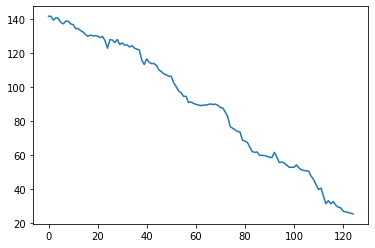

In [54]:
plt.plot(bagging_pred)

In [60]:
# Let's have a look to predict the score for second inning
df=pd.read_excel('/home/muhammadshahzad/Downloads/1157374_2.xlsx')
df.Team=df.Team.map({'Australia':1,'Pakistan':0})
df.Venue=df.Venue.map({'Away':1,'Home':0})
df.Win_Loss=df.Win_Loss.map({'Win':1,'Loss':0})
df.Batting_Strike_Rate=df.Batting_Strike_Rate.astype(int)
df.Bowling_Strike_Rate=df.Bowling_Strike_Rate.astype(int)
df=df.drop(['Target'],axis=1)
df.head()
adabost_pred=adaboost.predict(df)
print('Max value of prediction: ',adabost_pred.max(),'\nMean value of prediction: ',adabost_pred.mean(),'\nMin value of Prediction: ',adabost_pred.min())

Max value of prediction:  140.81 
Mean value of prediction:  91.57686440677966 
Min value of Prediction:  34.65


In [63]:
bagg_pred=model_2.predict(df)
print('Max value of prediction: ',bagg_pred.max(),'\nMean value of prediction: ',bagg_pred.mean(),'\nMin value of Prediction: ',bagg_pred.min())

Max value of prediction:  143.6 
Mean value of prediction:  91.9186440677966 
Min value of Prediction:  28.1


In [58]:
DTree_pred=model_1.predict(df)
print('Max value of prediction: ',DTree_pred.max(),'\nMean value of prediction: ',DTree_pred.mean(),'\nMin value of Prediction: ',DTree_pred.min())

Max value of prediction:  136.0 
Mean value of prediction:  89.44067796610169 
Min value of Prediction:  18.0


In [59]:
#Error of Decision Tree Regressor for Second Inning
dt_error=(DTree_pred.max()-162)**2/162*100
error_dt=np.sqrt(dt_error)
print('error of Decison Tree Regressor: ',error_dt)
# Error of AdaBoost Regressor
error_ad=(adaboost_pred.max()-162)**2/162*100
error_ad=np.sqrt(error_ad)
print('Error of AdaBoost Regressor: ',error_ad)
#Error of BaggingRegressor
error_xg=(bagging_pred.max()-162)**2/162*100
erro_xg=np.sqrt(error_xg)
print('Error of BaggingRegressor: ',error_xg)

error of Decison Tree Regressor:  20.42752923427804
Error of AdaBoost Regressor:  16.6484363259366
Error of BaggingRegressor:  208.9876543209878


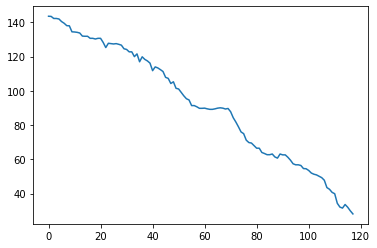

In [62]:
plt.plot(bagging_pred)